<a href="https://colab.research.google.com/github/izumizawa/mc886y2021/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1
## MC886 A - Machine Learning
### Profª Esther Colombini
#### First Semester 2021

# Group

- Mariana Megumi Izumizawa - RA 221859
- Matheus Carvalho Hatzlhoffer- RA 222174

# Part I - Clustering Methods

Implementation of k-means and another unsupervised learning method, in our case it is DBSCAN (Density Based Spatial Clustering of Application with Noise).

In [114]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import math
from sklearn.decomposition import PCA

## Data splitting in training and test sets
Returns first `training set` and then `test set` depending on the percentage in argument.

In [2]:
def split_data(data, test_percent):
  test_numbers = int(round(test_percent*len(data)))
  shuffled_data = np.array(data)
  np.random.shuffle(shuffled_data)
  return shuffled_data[test_numbers:], shuffled_data[:test_numbers]

## Distance calculation
Euclidian distance as 

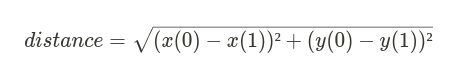

In [3]:
def euclidian_distance(a, b):
  return math.sqrt(math.pow(a[0] - b[0], 2) + math.pow(a[1] - b[1], 2))

## Pre-processing data

Data normalization using the following formula:

![Formula](https://miro.medium.com/max/341/0*oRhJXkyKqqYp8--e.)

In [5]:
def normalization(data):
  max_x = np.max(data, axis=0)[0]
  min_x = np.min(data, axis=0)[0]
  max_y = np.max(data, axis=0)[1]
  min_y = np.min(data, axis=0)[1]
  for x in data:
    x[0] = (x[0] - min_x)/(max_x - min_x)
    x[1] = (x[1] - min_y)/(max_y - min_y)

## Evaluate with silhouette score 

In [62]:
def silhouette_score(data, label):
  if (max(label) < 2):
    # print("Error: there is only one cluster. Number of clusters must be greater than one.")
    return -2
  # a = mean intra cluster distance
  # b = mean nearest cluster distance
  silhouette_score_sample_list = []
  mean_intra_cluster_samples = [] # a
  sample_nearest_cluster = np.array([-1]*len(data))
  mean_nearest_cluster_samples = [] # b

  max_x = np.max(data, axis=0)[0]
  min_x = np.min(data, axis=0)[0]
  max_y = np.max(data, axis=0)[1]
  min_y = np.min(data, axis=0)[1]
  max_distance = euclidian_distance([max_x, max_y], [min_x, min_y])

  for i in range(len(data)):
    if (label[i] == 0):
      continue
    sample_mean_intra = []
    sample_min_dist_cluster = max_distance
    for j in range(len(data)):
      if (i != j):
        dist = euclidian_distance(data[i], data[j])
        if (label[i] == label[j]):
          sample_mean_intra.append(dist)
        else:
          if (dist <= sample_min_dist_cluster):
            sample_min_dist_cluster = dist
            sample_nearest_cluster[i] = label[j]
    mean_intra_cluster_samples.append(np.mean(np.array(sample_mean_intra)))

  for i in range(len(data)):
    if (label[i] == 0):
      continue
    sample_mean_nearest = []
    for j in range(len(data)):
      if (label[j] == sample_nearest_cluster[i]):
        dist = euclidian_distance(data[i], data[j])
        sample_mean_nearest.append(dist)
    mean_nearest_cluster_samples.append(np.mean(np.array(sample_mean_nearest)))

  if (len(mean_intra_cluster_samples) != len(mean_nearest_cluster_samples)):
    # print("Error: mean intra-cluster distance and mean nearest-cluster distance have different sizes.")
    return -2
  # s = (b-a)/ max(a,b)
  for i in range(len(mean_nearest_cluster_samples)):
    silhouette_score_sample = (mean_nearest_cluster_samples[i] - mean_intra_cluster_samples[i])/(max(mean_nearest_cluster_samples[i], mean_intra_cluster_samples[i]))
    silhouette_score_sample_list.append(silhouette_score_sample)
  silhouette_score = np.mean(np.array(silhouette_score_sample_list))
  return silhouette_score

## K-means implementation

In [89]:
def k_means(k, data):
  centers = np.array(random.sample(list(data), k))
  old_centers = np.zeros(centers.shape)
  clusters = []
  label = []

  if (k <= 1):
    print("Error: Number of clusters must be greater than 1.")
    return -1, -1

  for i in range(k):
    clusters.append([])

  while not (np.array_equal(old_centers, centers)):
    label = []
    for i in range(k):
      clusters[i] = []
    old_centers = deepcopy(centers)
    for i in range(len(data)):
      winner_distance = math.sqrt(math.pow(np.max(data, axis=0)[0], 2) + math.pow(np.max(data, axis=0)[1], 2))
      winner_cluster = 1
      for j in range(len(centers)):
        distance = euclidian_distance(centers[j], data[i])
        if (distance < winner_distance):
          winner_distance = distance
          winner_cluster = j + 1
      clusters[winner_cluster - 1].append(list(data[i].astype(float)))
      label.append(winner_cluster)

    for i in range(k):
      center_x = np.mean([x[0] for x in clusters[i]])
      center_y = np.mean([x[1] for x in clusters[i]])
      centers[i] = [center_x, center_y]

  return centers, label

## Show k-means clusters with different colors

In [81]:
def print_clusters(data, label, *args, **kwargs):
  n_cluster = max(label)
  if (max(label) == 0):
    n_cluster = 1
  for i in range(len(data)):
    colors = cm.rainbow(np.array(label).astype(float) / n_cluster)
    plt.scatter(data[:,0], data[:,1], color=colors, s=10)

  if (args != ()):
    plt.scatter(args[0][:,0], args[0][:,1], c='black')
  plt.grid()
  plt.title(kwargs["title"])
  plt.show()

## Plot silhouette score for k-means

In [9]:
def print_silhouette_score_kmeans(k_min, k_max, data):
  for k in range(k_min, k_max+1):
    centers, label = k_means(k, data)
    y = silhouette_score(data, label)
    if (y != -2):
      plt.bar(k, y)
  plt.title("Silhouette score for k-means")
  plt.xlabel("clusters")
  plt.ylabel("Silhouette score")
  plt.show()

## Implementation of DBSCAN

In [66]:
def get_neighbors(data, index, eps):
  neighbors = []
  for i in range(len(data)):
    if (euclidian_distance(data[i], data[index]) <= eps):
      neighbors.append(i)
  return neighbors

def dbscan(data, eps, min_points=4):
  cluster_id = 0
  label = [-1]*len(data)
  shuffled_index = np.arange(len(data))
  np.random.shuffle(shuffled_index)

  for i in shuffled_index:
    if (label[i] == -1):
      neighbors = get_neighbors(data, i, eps)
      if (len(neighbors) < min_points):
        label[i] = 0
      else:
        cluster_id += 1
        label[i] = cluster_id
        seed_set = deepcopy(neighbors)
        seed_set.pop(neighbors.index(i))
        for x in seed_set:
          if (label[x] == 0):
            label[x] = cluster_id
          elif (label[x] == -1):
            label[x] = cluster_id
            neighbors = get_neighbors(data, x, eps)
            if (len(neighbors) >= min_points):
              for y in neighbors:
                seed_set.append(y)
  return label

## Choosing the best DBSCAN clusterization

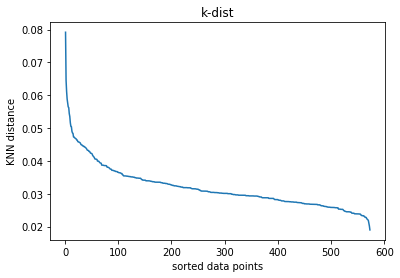

0.038721696811084005


In [31]:
def k_nearest_neighbor(k, data):
  k_distances = []
  for i in range(len(data)):
    point_distances = []
    for j in range(len(data)):
      distance = euclidian_distance(data[i], data[j])
      point_distances.append(distance)
    point_distances.sort()
    k_distances.append(point_distances[k]) # K neighbor
  k_distances.sort(reverse = True)
  x = [y+1 for y in range(len(data))]
  plt.plot(x, k_distances)
  plt.title("k-dist")
  plt.xlabel("sorted data points")
  plt.ylabel("KNN distance")
  plt.show()

  x1, y1 = 0, k_distances[0]
  x2, y2 = len(data), k_distances[len(k_distances)-1]

  distances = []
  for i in range(len(k_distances)):
    x0 = i
    y0 = k_distances[i]
    numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
    distances.append(numerator/denominator)
  return k_distances[distances.index(max(distances))]

normalization(data)
print(k_nearest_neighbor(4, data))

In [67]:
def best_clusters_dbscan(data, iter_n, min_points, min_eps, max_eps, step):
  best_silhouette_score = -1
  best_label = []
  eps = min_eps
  while (eps <= max_eps):
    for i in range(iter_n):
      label = dbscan(data, eps, min_points)
      current_silhouette_score = silhouette_score(data, label)
      if (current_silhouette_score > best_silhouette_score):
        best_silhouette_score = current_silhouette_score
        best_label = deepcopy(label)
    eps += step
  return best_label, best_silhouette_score

## Apply functions with given dataset (`cluster.dat`)

In [10]:
from google.colab import files
uploaded = files.upload()

Saving cluster.dat to cluster.dat


In [108]:
string_data = ([np.array(x.split(" ")) for x in uploaded['cluster.dat'].decode("utf-8").split('\n')])
# Cleaning data
string_data = string_data[:-1]
data = np.array([x.astype(float) for x in string_data])

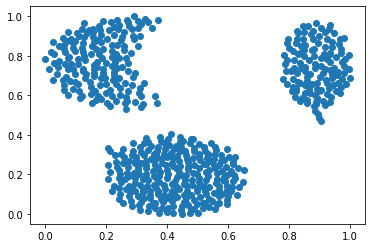

In [68]:
plt.scatter(data[:,0], data[:,1])
plt.show()

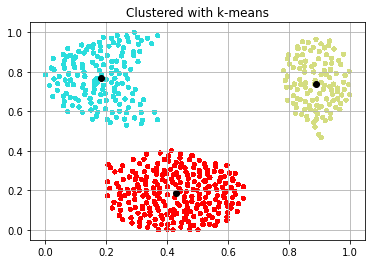

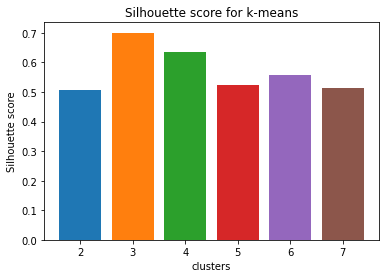

In [88]:
training_set, test_set = split_data(data, 0.1)
normalization(training_set)
centers, label_k_means = k_means(3, training_set)
print_clusters(training_set, label_k_means, centers, title = "Clustered with k-means")
print_silhouette_score_kmeans(2, 7, training_set)

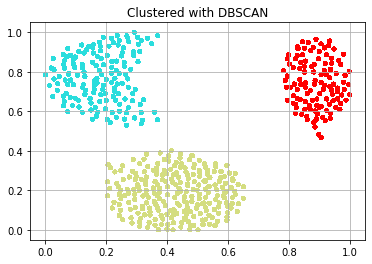

Silhouette score: 0.70


In [110]:
label_dbscan, current_silhouette_score = best_clusters_dbscan(training_set, 5, 4, 0.1, 0.5, 0.05)
print_clusters(training_set, label_dbscan, title = "Clustered with DBSCAN")
print("Silhouette score: %.2f" % current_silhouette_score)

## Testing set

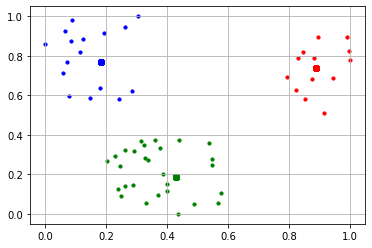

In [104]:
def set_k_means_cluster(test_set, centers):
  label = [-1]*len(test_set)
  max_x = max(np.max(test_set, axis=0)[0], np.max(centers, axis=0)[0])
  min_x = min(np.min(test_set, axis=0)[0], np.min(centers, axis=0)[0])
  max_y = max(np.max(test_set, axis=0)[1], np.max(centers, axis=0)[1])
  min_y = min(np.min(test_set, axis=0)[1], np.min(centers, axis=0)[1])

  for i in range(len(test_set)):
    winner_distance = euclidian_distance([max_x, max_y], [min_x, min_y])
    for j in range(len(centers)):
      dist = euclidian_distance(test_set[i], centers[j])
      if (dist < winner_distance):
        winner_distance = dist
        label[i] = j + 1
  return label

normalization(test_set)
label_k_means_test = set_k_means_cluster(test_set, centers)
for i in range(len(test_set)):
  if (label_k_means_test[i] == 1):
    plt.scatter(test_set[i][0], test_set[i][1], color="blue", s=10)
    plt.scatter(centers[0][0], centers[0][1], color="blue")
  if (label_k_means_test[i] == 2):
    plt.scatter(test_set[i][0], test_set[i][1], color="red", s=10)
    plt.scatter(centers[1][0], centers[1][1], color="red")
  if (label_k_means_test[i] == 3):
    plt.scatter(test_set[i][0], test_set[i][1], color="green", s=10)
    plt.scatter(centers[2][0], centers[2][1], color="green")
plt.grid()
plt.show()

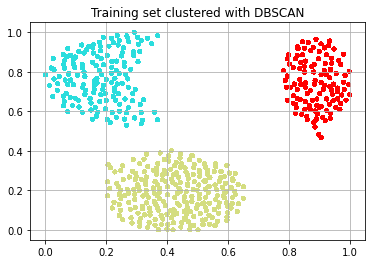

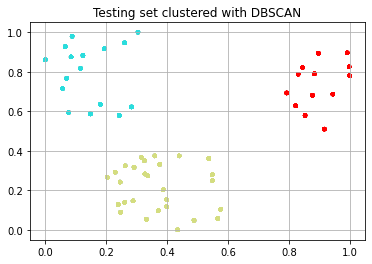

In [112]:
def set_dbscan_cluster(test_set, training_set, label):
  label_dbscan_test = [-1]*len(test_set)
  max_x = max(np.max(test_set, axis=0)[0], np.max(training_set, axis=0)[0])
  min_x = min(np.min(test_set, axis=0)[0], np.min(training_set, axis=0)[0])
  max_y = max(np.max(test_set, axis=0)[1], np.max(training_set, axis=0)[1])
  min_y = min(np.min(test_set, axis=0)[1], np.min(training_set, axis=0)[1])

  for i in range(len(test_set)):
    winner_distance = euclidian_distance([max_x, max_y], [min_x, min_y])
    for j in range(len(training_set)):
      dist = euclidian_distance(test_set[i], training_set[j])
      if (dist < winner_distance):
        winner_distance = dist
        label_dbscan_test[i] = label[j]
  return label_dbscan_test


label_dbscan_test = set_dbscan_cluster(test_set, training_set, label_dbscan)
print_clusters(training_set, label_dbscan, title = "Training set clustered with DBSCAN")
print_clusters(test_set, label_dbscan_test, title="Testing set clustered with DBSCAN")

# Part II - Dimensionality reduction

In [113]:
uploaded = files.upload()

Saving affairs.csv to affairs.csv


[[ 2.16215982  3.14575181]
 [ 1.60923574 -3.65130821]
 [-9.71055308  0.63316408]
 ...
 [-9.74052476 -0.98758402]
 [-0.2407528   3.02036245]
 [-9.69542249  0.47520776]]
[5, 5, 3, 2, 5, 5, 1, 1, 3, 4, 4, 5, 2, 5, 3, 2, 5, 1, 1, 5, 3, 2, 1, 5, 5, 4, 5, 2, 2, 5, 2, 5, 2, 2, 1, 5, 3, 1, 2, 3, 4, 3, 2, 3, 3, 3, 3, 1, 2, 3, 4, 1, 3, 1, 1, 1, 2, 4, 5, 2, 3, 2, 2, 5, 3, 2, 2, 5, 3, 1, 4, 2, 5, 2, 5, 2, 5, 3, 2, 3, 2, 2, 5, 3, 5, 3, 3, 5, 1, 2, 2, 5, 4, 5, 2, 5, 3, 1, 5, 4, 2, 2, 3, 2, 5, 3, 3, 4, 2, 5, 3, 4, 5, 5, 2, 3, 3, 3, 2, 5, 4, 5, 5, 3, 5, 5, 3, 2, 5, 4, 4, 1, 5, 1, 5, 1, 4, 4, 1, 1, 4, 2, 4, 1, 3, 5, 3, 5, 5, 5, 3, 2, 4, 4, 5, 2, 2, 1, 2, 2, 3, 5, 2, 3, 2, 1, 5, 3, 1, 1, 3, 5, 1, 5, 2, 5, 4, 3, 4, 3, 5, 5, 1, 3, 2, 2, 5, 1, 2, 2, 5, 2, 5, 5, 1, 4, 3, 3, 2, 3, 5, 5, 4, 2, 4, 1, 1, 3, 3, 3, 2, 2, 2, 5, 4, 5, 2, 5, 5, 3, 3, 4, 1, 5, 5, 1, 3, 2, 3, 5, 4, 2, 5, 1, 2, 2, 1, 1, 2, 5, 1, 2, 2, 5, 4, 1, 5, 5, 3, 4, 1, 2, 2, 5, 1, 5, 2, 2, 1, 5, 1, 5, 2, 3, 2, 5, 4, 3, 2, 2, 4, 1, 3, 4, 2, 3, 2, 

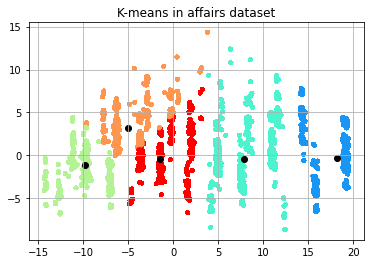

In [165]:
affairs_data_string = uploaded['affairs.csv'].decode("utf-8").split('\n')
affairs_data_string.pop(0)
affairs_data_string.pop(-1)
affairs_string = np.array([x.split(',') for x in affairs_data_string])
affairs_string = affairs_string[:,1:]
affairs_data = np.array([np.array(x).astype(float) for x in affairs_string])

pca = PCA(n_components=2)
pca.fit(affairs_data)
a = pca.transform(affairs_data)
print(a)
centers_affairs, label_affairs = k_means(5, a)
print(label_affairs,"\n", centers_affairs)
print_clusters(a, label_affairs, centers_affairs, title = "K-means in affairs dataset")